<a href="https://colab.research.google.com/github/Shekharbejawada/ml/blob/main/ML_lab_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#FIND-S
import numpy as np
import pandas as pd
data=pd.read_csv("Sample.csv")
print(data)
d=np.array(data)[:,:-1]
target=np.array(data)[:,-1]
def train(c,t):
    for i,val in enumerate(t):
        if val=='yes':
            specific_h=c[i].copy()
            break
    for i,val in enumerate(c):
        if t[i]=='yes':
            for x in range(len(specific_h)):
                if val[x]!=specific_h[x]:
                    specific_h[x]='?'
                else:
                    pass
    return specific_h
train(d,target)

     sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes


array(['sunny', 'warm', '?', 'strong', '?', '?'], dtype=object)

In [ ]:
#Candidiate Elimination
import numpy as np
import pandas as pd
data = pd.read_csv("Sample.csv")
print(data)
d = np.array(data.iloc[:,0:-1])
d
print("\nInstances are:\n",d)
target = np.array(data.iloc[:,-1])
print("\nTarget Values are: ",target)
def learn(d, target):
    specific_h = d[0].copy()
    print("\nInitialization of specific_h and genearal_h")
    print("\nSpecific Boundary: ", specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print("\nGeneric Boundary: ",general_h)
    for i, h in enumerate(d):
        print("\nInstance", i+1 , "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    specific_h[x] ='?'
                    general_h[x][x] ='?'
        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x]!= specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(d, target)
print("Final Specific_h: ", s_final, sep="\n")
print("Final General_h: ", g_final, sep="\n")

     sky airtemp humidity    wind water forcast enjoysport
0  sunny    warm   normal  strong  warm    same        yes
1  sunny    warm     high  strong  warm    same        yes
2  rainy    cold     high  strong  warm  change         no
3  sunny    warm     high  strong  cool  change        yes

Instances are:
 [['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cool' 'change']]

Target Values are:  ['yes' 'yes' 'no' 'yes']

Initialization of specific_h and genearal_h

Specific Boundary:  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
Instance is Positive 

Instance 2 is  ['sunny' 'wa

In [ ]:
#ID3
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
data={'CGPA':['g9','g8','g9','l8','g8','g9','l8','g9','g8','g8'],
    'Inter':['Y','N','N','N','Y','Y','Y','N','Y','Y'],
    'PK':['+++','+','==','==','+','+','+','+++','+','=='],
    'CS':['G','M','P','G','M','M','P','G','G','G'],
    'Job':['Y','Y','N','N','Y','Y','N','Y','Y','Y']}
table=pd.DataFrame(data,columns=["CGPA","Inter","PK","CS","Job"])
table.where(table["CGPA"]=="g9").count()
encoder=LabelEncoder()
for i in table:
    table[i]=encoder.fit_transform(table[i])
X=table.iloc[:,0:4].values
y=table.iloc[:,4].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)
model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model=model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))
print(classification_report(y_test,y_pred))
print([1,0,0,1])
if model.predict([[1,0,0,1]])==1:
    print("Got Job")
else:
    print("Didn't get job")

Accuracy: 1.0
[[0 0]
 [0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[1, 0, 0, 1]
Got Job


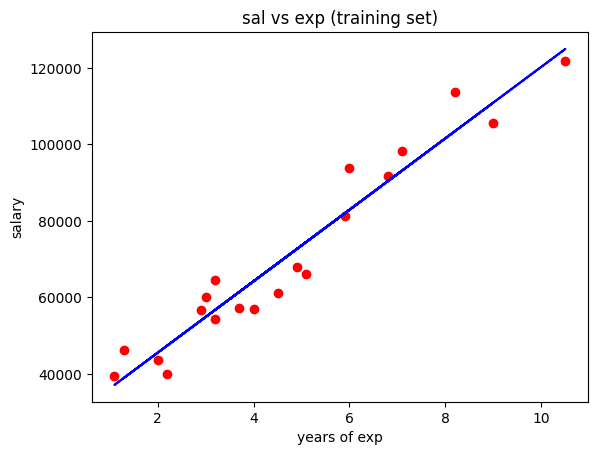

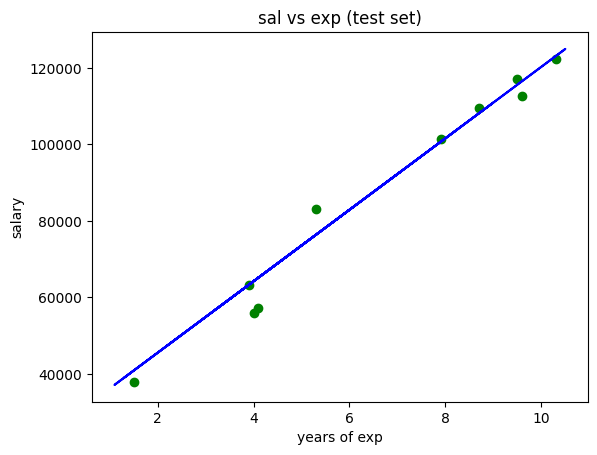

r2 score 0.9749154407708353
mean squared error 21026037.329511296
weights [9345.94244312]
Intercept 26816.192244031183


In [ ]:
#Single-Linear Regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
dataset=pd.read_csv('Salary_Data.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('sal vs exp (training set)')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.show()
plt.scatter(X_test,y_test,color='green')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('sal vs exp (test set)')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.show()
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('r2 score',r2)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('weights',regressor.coef_)
print("Intercept",regressor.intercept_)

In [ ]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#KNN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
dataset = pd.read_csv("iris.csv")
print(dataset.shape)
print(dataset.head())
print(dataset.describe())
X=dataset.iloc[:,1:4].values
y=dataset.iloc[:,4].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=2)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy of our model is equal: '+ str(round(accuracy,2))+'%.')

(149, 5)
   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
              5.1         3.5         1.4         0.2
count  149.000000  149.000000  149.000000  149.000000
mean     5.848322    3.051007    3.774497    1.205369
std      0.828594    0.433499    1.759651    0.761292
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.400000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
['Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-versicolor' 'Iris-

In [ ]:
#Naive Bayes
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
CGPA=['g9','g8','g9','l8','g8','g9','l8','g9','g8','g8']
Inter=['Y','N','N','N','Y','Y','Y','N','Y','Y']
PK=['+++','+','==','==','+','+','+','+++','+','==']
CS=['G','M','P','G','M','M','P','G','G','G']
Job=['Y','Y','N','N','Y','Y','N','Y','Y','Y']
le = preprocessing.LabelEncoder()
CGPA_encoded = le.fit_transform(CGPA)
print("CGPA:",CGPA_encoded)
Inter_encoded = le.fit_transform(Inter)
PK_encoded = le.fit_transform(PK)
CS_encoded = le.fit_transform(CS)
label = le.fit_transform(Job)
print("Inter:",Inter_encoded)
print("PK:",PK_encoded)
print("CS:",CS_encoded)
print("Job:",label)
features = []
for i in range(len(CGPA_encoded)):
    features.append([CGPA_encoded[i],Inter_encoded[i],PK_encoded[i],CS_encoded[i]])
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.30,random_state=2)
model = GaussianNB()
model.fit(features,label)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred, labels=[0, 1]))
print([2,0,2,0])
if model.predict([[2,0,2,0]])==1:
    print("Predicted value: Got Job")
else:
    print("Predicted value: Didn't get Job")

CGPA: [1 0 1 2 0 1 2 1 0 0]
Inter: [1 0 0 0 1 1 1 0 1 1]
PK: [1 0 2 2 0 0 0 1 0 2]
CS: [0 1 2 0 1 1 2 0 0 0]
Job: [1 1 0 0 1 1 0 1 1 1]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

[[0 0]
 [0 3]]
[2, 0, 2, 0]
Predicted value: Didn't get Job


In [ ]:
#Naive Bayes
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix
CGPA=['g9','g8','g9','l8','g8','g9','l8','g9','g8','g8']
Inter=['Y','N','N','N','Y','Y','Y','N','Y','Y']
PK=['+++','+','==','==','+','+','+','+++','+','==']
CS=['G','M','P','G','M','M','P','G','G','G']
Job=['Y','Y','N','N','Y','Y','N','Y','Y','Y']
le = preprocessing.LabelEncoder()
CGPA_encoded = le.fit_transform(CGPA)
print("CGPA:",CGPA_encoded)
Inter_encoded = le.fit_transform(Inter)
PK_encoded = le.fit_transform(PK)
CS_encoded = le.fit_transform(CS)
label = le.fit_transform(Job)
print("Inter:",Inter_encoded)
print("PK:",PK_encoded)
print("CS:",CS_encoded)
print("Job:",label)
features = []
for i in range(len(CGPA_encoded)):
 features.append([CGPA_encoded[i],Inter_encoded[i],PK_encoded[i],CS_encoded[i]])
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.30,random_state=2)
model = GaussianNB()
model.fit(features,label)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print([2,0,2,0])
if model.predict([[2,0,2,0]])==1:
 print("Predicted value: Got Job")
else:
 print("Predicted value: Didn't get Job")

CGPA: [1 0 1 2 0 1 2 1 0 0]
Inter: [1 0 0 0 1 1 1 0 1 1]
PK: [1 0 2 2 0 0 0 1 0 2]
CS: [0 1 2 0 1 1 2 0 0 0]
Job: [1 1 0 0 1 1 0 1 1 1]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3

[[3]]
[2, 0, 2, 0]
Predicted value: Didn't get Job
